Para criar a venv usei: mkvirtualenv pdfparsingenv
Para liberar o acesso no powershell usei:Set-ExecutionPolicy -Scope CurrentUser -ExecutionPolicy RemoteSigned
Para Ativar a env usei: C:\Users\Leo\Envs\pdfparsingenv\Scripts\activate.ps1

In [ ]:
#terminal
pip installl tabula-py

pip install pandas

In [1]:
import tabula
#the pd is the standard shorthand for pandas
import pandas as pd
from natsort import natsorted
import PIL
import PIL.Image
import base64
from PIL import Image
from io import BytesIO

In [2]:
#declare the path of your file
file_path = r"pdftoparsing.pdf"
#Convert your file
df = tabula.read_pdf(file_path, pages='all',multiple_tables=True)

In [3]:
df[1]

,Unnamed: 0,Unnamed: 1,"RUA ARIOVALDO SILVEIRA FRANCO, 567 - JD 31 DE MARÇO"
0,"Faculdade de Tecnologia de Mogi Mirim ""Arthur de",NaN,NaN
1,NaN,NaN,CEP: 13801-005 - Mogi Mirim/SP
2,"Azevedo""",NaN,NaN
3,NaN,NaN,Tel: 19 3806-3139
4,LEONARDO VINÍCIUS DA SILVA,NaN,NaN
5,Curso Superior de Tecnologia em Análise e Dese...,NaN,NaN
6,Sistemas,NaN,NaN
7,PERÍODO *1630481813020*RG Noite 549672916 CPF,45079019875,NaN
8,RA: 1630481813020 NASCIMENTO,08/09/1998,NaN
9,EXPEDIÇÃO 22/03/22 VALIDADE,21/03/25,NaN


In [4]:
dfFinal = pd.DataFrame( columns= ['ra', 'nome_aluno','data_nascimento','rg_aluno','cpf_aluno','curso','periodo','expCarteirinha','valCarteirinha','faculdade','rua','telefone','foto','qrcode'])
for i in range(len(df)):
    ##CORREÇÕES##
    ra_error = df[i].iloc[8][0]
    ra_error = [ra_error.split()]
    ra= ra_error[0][1]
    erro7 = df[i].loc[7][0] # periodo ra tg palavra cpf
    erro7 = [erro7.split()]
    expedicao = df[i].loc[9][0]
    expedicao = [expedicao.split()]
    curso = curso = df[i].loc[5][0] +  df[i].loc[6][0]
    faculdade = nome_faculdade = df[i].loc[0][0] + df[i].loc[2][0]

    ############## construção Banco #############
    #Dados Aluno
    ra = ra # ra do aluno nome data nascimento
    nome_aluno = df[i].loc[4][0] # Nome do Aluno
    data_nascimento = df[i].loc[8][1] # data de nascimento real
    rg_aluno = erro7[0][3] #RG Real
    cpf_aluno= df[i].loc[7][1] # cpf completo
    #Dados Curso
    curso = df[i].loc[5][0] # Curso completo
    periodo= erro7[0][2] # Periodo real
    #Dados Carteirinha
    expCarteirinha = expedicao[0][1] # expedição carteirinha
    valCarteirinha = df[i].loc[9][1] # validade da carteirinha
    #Dados Fatec
    faculdade # Nome da faculdade 
    rua = "RUA ARIOVALDO SILVEIRA FRANCO, 567 - JD 31 DE MARÇO" # rua da faculdade
    cep = "CEP: 13801-005 - Mogi Mirim/SP" # cep e cidade faculdade
    telefone = "Tel: 19 3806-3139" # telefone faculdade
    foto = None
    qrcode = None
    listaAluno = [(ra, nome_aluno,data_nascimento,rg_aluno,cpf_aluno,curso,periodo,expCarteirinha,valCarteirinha,faculdade,rua,telefone,foto,qrcode)]
    dfNovoAluno = pd.DataFrame(listaAluno, columns=['ra', 'nome_aluno','data_nascimento','rg_aluno','cpf_aluno','curso','periodo','expCarteirinha','valCarteirinha','faculdade','rua','telefone','foto','qrcode'])
    dfFinal = pd.concat([dfFinal,dfNovoAluno],ignore_index=True)
    

In [12]:
dfFinal

,ra,nome_aluno,data_nascimento,rg_aluno,cpf_aluno,curso,periodo,expCarteirinha,valCarteirinha,faculdade,rua,telefone,foto,qrcode
0,1630481813004,CAUÊ NASCIMENTO GUEDES,23/02/2000,58455848X,47773567875,Curso Superior de Tecnologia em Análise e Dese...,Noite,22/03/22,21/03/25,"Faculdade de Tecnologia de Mogi Mirim ""Arthur ...","RUA ARIOVALDO SILVEIRA FRANCO, 567 - JD 31 DE ...",Tel: 19 3806-3139,b'iVBORw0KGgoAAAANSUhEUgAAAHgAAAB4CAIAAAC2BqGF...,None
1,1630481813020,LEONARDO VINÍCIUS DA SILVA,08/09/1998,549672916,45079019875,Curso Superior de Tecnologia em Análise e Dese...,Noite,22/03/22,21/03/25,"Faculdade de Tecnologia de Mogi Mirim ""Arthur ...","RUA ARIOVALDO SILVEIRA FRANCO, 567 - JD 31 DE ...",Tel: 19 3806-3139,b'iVBORw0KGgoAAAANSUhEUgAAAHgAAAB4CAIAAAC2BqGF...,None
2,1630481813041,LUCAS RAFAEL PAULINO,19/05/2000,587900295,48544706827,Curso Superior de Tecnologia em Análise e Dese...,Noite,22/03/22,21/03/25,"Faculdade de Tecnologia de Mogi Mirim ""Arthur ...","RUA ARIOVALDO SILVEIRA FRANCO, 567 - JD 31 DE ...",Tel: 19 3806-3139,b'iVBORw0KGgoAAAANSUhEUgAAAHgAAAB4CAIAAAC2BqGF...,None


In [6]:
def ImageDirFoto():
        import os
        cwd = os.getcwd() + "\\foto"
        paths = []
        for root, dirs, files in os.walk(cwd):
            for file in files:
                if file.endswith(".png"):
                    paths.append(os.path.join(root, file))
        paths = natsorted(paths)
        return paths

In [7]:
def ImageDirQrcode():
        import os
        cwd = os.getcwd() + "\\qrcode"
        paths = []
        for root, dirs, files in os.walk(cwd):
            for file in files:
                if file.endswith(".png"):
                    paths.append(os.path.join(root, file))
        paths = natsorted(paths)
        return paths

In [8]:
imagens = ImageDirFoto()
imagens

['c:\\Users\\Leo\\Documents\\code\\parsiingpdftomysql\\foto\\6.png',
 'c:\\Users\\Leo\\Documents\\code\\parsiingpdftomysql\\foto\\10.png',
 'c:\\Users\\Leo\\Documents\\code\\parsiingpdftomysql\\foto\\14.png']

In [9]:
def convertendoImagemBase64(dir):
    data = []
    for i in range(len(dir)):
        with open(dir[i] , "rb") as image_file:
            data.append(base64.b64encode(image_file.read()))

    return data

In [10]:
def adicionandoImagemBase64aoDF(data):
    for i in range(len(data)):
        dfFinal.iloc[i, 12] = data[i]

In [11]:
res = convertendoImagemBase64(imagens)
adicionandoImagemBase64aoDF(res)

In [ ]:
res = convertendoImagemBase64(imagens)
adicionandoImagemBase64aoDF(res)

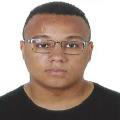

In [15]:
im = Image.open(BytesIO(base64.b64decode(dfFinal.iloc[2,12])))
display(im)